In [1]:
import pandas as pd

# Tabela de zona

In [2]:
df_zona = pd.read_excel('vendedores_zonas.xlsx')
df_zona.columns


Index(['Unnamed: 0', 'id_fornecedor_x', 'nome_fornecedor', 'data_registro',
       'qtde_produtos', 'preco_medio', 'avaliacao_media', 'e_aprovado',
       'nome_empresa', 'id_endereco', 'delivery_raio_km', 'delivery_sistema',
       'hora_abertura', 'hora_fechamento', 'data_aprovacao', 'data_reprovacao',
       'id_fornecedor_y', 'bairro', 'ponto_referencia', 'cidade', 'estado_x',
       'uf', 'pais_x', 'tipo', 'cep', 'id_cidade', 'esta_disponivel',
       'estado_y', 'pais_y', 'Zona', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

# Tabela de opiniões

In [3]:
df_rat = pd.read_csv(r'Dados Nestle/tb_ratings.csv', sep=';')
df_rat

,id_avalicoes,id_cliente,id_ordem,id_produto,revisao,media_avaliacao,comparecimento,sabor,aparencia
0,6037e853bbcec50021417e8c,5fb83a5d2513e10021a0649d,5fb83faa2513e10021a07b47,5f6e56208c135d00214d2d92,NaN,5.000000e+00,5.000000e+00,5.0,5.0
1,60390381fa056600218c495a,5fb8302e2513e100219ff598,5fbc12d67aaa5b0021ebba06,5f8cdc2948de890021a680e9,"Muito gostoso! Entrega no horário, recomendo",5.000000e+00,5.000000e+00,5.0,5.0
2,603ce963da404a00218c5ab9,5f550609cba01d00210ed014,6006e12f0ec26c0021249c07,5f6a1d08f309620021ca269c,NaN,5.000000e+00,5.000000e+00,5.0,5.0
3,603ce96cda404a00218c5ac4,5f550609cba01d00210ed014,5f9dd65a9edca400210014f3,5f6a1d08f309620021ca269c,NaN,5.000000e+00,5.000000e+00,5.0,5.0
4,603cf100da404a00218c616f,5fdca2594243fa0021c6455c,5fdcada34243fa0021c6671d,5fb41ffad0953900215bebf5,AMO OS PRODUTOS DA ATELIÊ DO DOCE! COMPRO SEMP...,5.000000e+00,5.000000e+00,5.0,5.0
...,...,...,...,...,...,...,...,...,...
47219,"Amamos """,5,5,5,5,1.627522e+12,1.627522e+12,NaN,NaN
47220,6102047c777941002110fcbd,5ffe70f171b9b600216b4f8b,60c3bf4652f4f30021f726f7,60c21e50af7bb3002180fe66,"Bolo delicioso, com muito capricho em cada det...",NaN,NaN,NaN,NaN
47221,"Amamos """,5,5,5,5,1.627522e+12,1.627522e+12,NaN,NaN
47222,610312f1db5a790021958560,5fbd444792c86d0021e8f250,60dccce2794617002184b78b,5fbd4f9f92c86d0021e963f5,NaN,5.000000e+00,5.000000e+00,5.0,5.0


### Dropando pedidos sem avaliações descritas para a wordcloud

In [4]:
df_rat.dropna(subset=['revisao'], inplace=True)

In [5]:
df_rat['revisao'] = df_rat['revisao'].astype('str')

In [6]:
pagamento_final =  pd.read_excel('pagamento_final.xlsx')
pagamento_final.columns

Index(['Unnamed: 0', 'id_ordens', 'id_pagamentos_cliente', 'id_cliente',
       'data_pagamento', 'valor', 'status_pagamento', 'metodo_pagamento',
       'data_correta', 'dia', 'semana', 'mes', 'hora', 'ano', 'quarter',
       'id_pagamento_fornecedor', 'id_ordem', 'id_fornecedor', 'status',
       'id_fornecedor_x', 'nome_fornecedor', 'data_registro', 'qtde_produtos',
       'preco_medio', 'avaliacao_media', 'e_aprovado', 'nome_empresa',
       'id_endereco', 'delivery_raio_km', 'delivery_sistema', 'hora_abertura',
       'hora_fechamento', 'data_aprovacao', 'data_reprovacao',
       'id_fornecedor_y', 'bairro', 'ponto_referencia', 'cidade', 'estado_x',
       'uf', 'pais_x', 'tipo', 'cep', 'id_cidade', 'esta_disponivel',
       'estado_y', 'pais_y', 'Zona'],
      dtype='object')

## Merge com dados de avaliação e dados do fornecedor

In [7]:
df_rat_zona = df_rat.merge(pagamento_final, how='inner', on=['id_ordem','id_cliente'])

## Selecionando opinioes por cliente, zona, produto e fornecedor

In [8]:
df_rat_zona_ = df_rat_zona[['revisao','id_avalicoes','id_cliente','id_fornecedor_x','id_ordem','data_correta','id_produto','Zona','id_cidade','cidade']]

In [9]:
df_rat_zona_

,revisao,id_avalicoes,id_cliente,id_fornecedor_x,id_ordem,data_correta,id_produto,Zona,id_cidade,cidade
0,"Muito gostoso! Entrega no horário, recomendo",60390381fa056600218c495a,5fb8302e2513e100219ff598,5f6a560c5e1816002176105d,5fbc12d67aaa5b0021ebba06,2020-11-23 20:20:39,5f8cdc2948de890021a680e9,Zona Sul,5f6a179af309620021ca264d,São Paulo
1,"Muito gostoso! Entrega no horário, recomendo",60390381fa056600218c495a,5fb8302e2513e100219ff598,5f6a560c5e1816002176105d,5fbc12d67aaa5b0021ebba06,2020-11-23 20:20:39,5f8cdc2948de890021a680e9,Zona Sul,5f6a179af309620021ca264d,São Paulo
2,"Muito gostoso! Entrega no horário, recomendo",60390381fa056600218c495a,5fb8302e2513e100219ff598,5f6a560c5e1816002176105d,5fbc12d67aaa5b0021ebba06,2020-11-23 20:20:39,5f8cdc2948de890021a680e9,Zona Sul,5f6a179af309620021ca264d,São Paulo
3,"Muito gostoso! Entrega no horário, recomendo",60390381fa056600218c495a,5fb8302e2513e100219ff598,5f6a560c5e1816002176105d,5fbc12d67aaa5b0021ebba06,2020-11-23 20:20:39,5f8cdc2948de890021a680e9,Zona Sul,5f6a179af309620021ca264d,São Paulo
4,"Muito gostoso! Entrega no horário, recomendo",60390381fa056600218c495a,5fb8302e2513e100219ff598,5f6a560c5e1816002176105d,5fbc12d67aaa5b0021ebba06,2020-11-23 20:20:39,5f8cdc2948de890021a680e9,Zona Sul,5f6a179af309620021ca264d,São Paulo
...,...,...,...,...,...,...,...,...,...,...
28011,"Bolo sensacional! Molhadinho, fresco e mesmo s...",6183336fb830240022a730d7,5fa18615519c950021c46537,60f3a59796be5900217a457d,6181ae5b4c0f0c0022e7fc54,2021-11-02 21:35:04,611e55d588b84e0022758709,Zona Norte,5f6a179af309620021ca264d,São Paulo
28012,"Bolo sensacional! Molhadinho, fresco e mesmo s...",6183336fb830240022a730d7,5fa18615519c950021c46537,60f3a59796be5900217a457d,6181ae5b4c0f0c0022e7fc54,2021-11-02 21:35:04,611e55d588b84e0022758709,Zona Norte,5f6a179af309620021ca264d,São Paulo
28013,"Bolo sensacional! Molhadinho, fresco e mesmo s...",6183336fb830240022a730d7,5fa18615519c950021c46537,60f3a59796be5900217a457d,6181ae5b4c0f0c0022e7fc54,2021-11-02 21:35:04,611e55d588b84e0022758709,Zona Norte,5f6a179af309620021ca264d,São Paulo
28014,"Bolo sensacional! Molhadinho, fresco e mesmo s...",6183336fb830240022a730d7,5fa18615519c950021c46537,60f3a59796be5900217a457d,6181ae5b4c0f0c0022e7fc54,2021-11-02 21:35:04,611e55d588b84e0022758709,Zona Norte,5f6a179af309620021ca264d,São Paulo


## Dropando opinoes duplicadas por id de avaliação, id do cliente, produto e data 

In [10]:
df_rat_zona_['data_correta'] = pd.to_datetime(df_rat_zona_['data_correta'],  dayfirst=True) 

<ipython-input-10-0594ec4653dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rat_zona_['data_correta'] = pd.to_datetime(df_rat_zona_['data_correta'],  dayfirst=True)


In [11]:
df_rat_zona_.sort_values(by=['data_correta'], ascending=False, inplace=True)
df_rat_zona_.drop_duplicates(subset=['id_avalicoes','id_cliente','id_fornecedor_x','id_ordem','data_correta','id_produto'], inplace=True)

<ipython-input-11-a97ae57a707c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rat_zona_.sort_values(by=['data_correta'], ascending=False, inplace=True)
<ipython-input-11-a97ae57a707c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rat_zona_.drop_duplicates(subset=['id_avalicoes','id_cliente','id_fornecedor_x','id_ordem','data_correta','id_produto'], inplace=True)


In [12]:
df_rat_zona_.reset_index(inplace=True,drop=True)

## Wordcloud por Zona

In [13]:
df_rat_zona_['id_cidade'].unique()

array(['5f6a179af309620021ca264d', '5f8da83c48de890021a728a8',
       '5f517b48c13e960021459f0c'], dtype=object)

In [14]:
df_rat_zona_['cidade'].unique()

array(['São Paulo', 'Santo André', 'Campinas'], dtype=object)

In [15]:
#cidade
df_cidade = df_rat_zona_.loc[df_rat_zona_['cidade']==df_rat_zona_['cidade'].unique()[0]]

print('zonas', df_rat_zona_['Zona'].unique())

aval_zona = df_cidade.loc[df_cidade['Zona'] == df_cidade['Zona'].unique()[0]]
aval_zona.reset_index(inplace=True,drop=True)


zonas ['Zona Norte' 'Zona Leste' 'Zona Central' 'Zona Sul' 'Zona Oeste' 'Outros']


In [16]:
#!pip install wordcloud

In [17]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [18]:
lista_strings=[]
for k in range(len(aval_zona)):
    string = aval_zona['revisao'][k]
    lista_strings.append(string)
stringona = eval(str(lista_strings).replace(","," "))

In [19]:
strigona = str(stringona).replace('fresquinho','fresco')

## Início NLP

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words('portuguese')
newStopWords = ['fiz','obrigada','aqui','obrigado','disso','nao','sendo','sensacional','nome','obrigado','simplesmente','ja','tudo','exatamente','segunda','condicoes','recomendo','alem','perfeitas','compra','feito','pedidos','achou','muitoo','muito','certo','excelente','delicioso','delicia','chegou','produto','super','pedido','produtos','veio','feitas','muito','bem','amou','adorei','bem']
sw.extend(newStopWords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ademi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#!pip install unidecode

In [22]:
from unidecode import unidecode
import re

#remove acentos, transforma para minusculo
strigona = unidecode(strigona).lower()

#remove ponto final, ponto de exclamação...
strigona = re.sub(r'[^\w\s]','',strigona)

#remove preposições
strigona_final =  ' '.join([k for k in strigona.split(" ") if k not in sw])

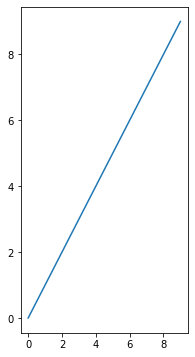

In [23]:
plt.figure(figsize=(3, 6))

plt.plot(range(10)) #plot example
plt.show() #for control

#fig.savefig('temp.png', dpi=fig.dpi)

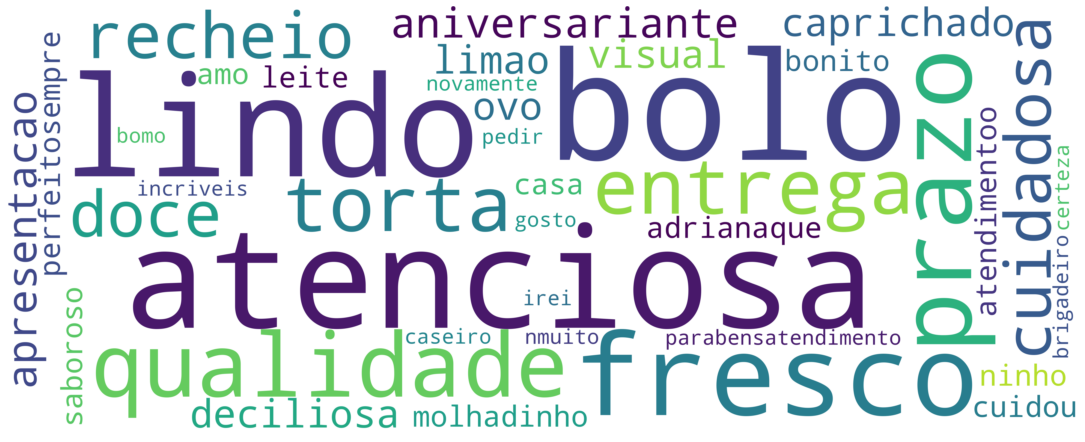

In [41]:
# Start with one review:
text = strigona_final

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 5000, height = 2000, max_font_size=700, max_words=40, background_color="white").generate(text)
#wordcloud.to_file('wordcloud_zn_sul.png')

# Display the generated image:
fig = plt.figure(figsize=(19.20,10.80))
#fig.set_figheight(60)
#fig.set_figwidth(80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig.savefig("wordcloud_zn_sul_nova.png")
plt.show()
